In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [37]:
dataset = pd.read_csv("My Uber Drives - 2016.csv")

In [38]:
dataset

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [39]:
dataset.shape


(1156, 7)

In [40]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


## Data Preprocessing

In [41]:
dataset['PURPOSE*'].fillna("NOT",inplace=True)

In [42]:
dataset.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NOT
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [43]:
dataset['START_DATE*'] = pd.to_datetime(dataset['START_DATE*'],errors='coerce')
dataset['END_DATE*'] = pd.to_datetime(dataset['END_DATE*'],errors='coerce')

In [44]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   START_DATE*  1155 non-null   datetime64[ns]
 1   END_DATE*    1155 non-null   datetime64[ns]
 2   CATEGORY*    1155 non-null   object        
 3   START*       1155 non-null   object        
 4   STOP*        1155 non-null   object        
 5   MILES*       1156 non-null   float64       
 6   PURPOSE*     1156 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [45]:
from datetime import datetime
dataset['DATE*']=pd.DatetimeIndex(dataset['START_DATE*']).date

In [46]:
dataset.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,DATE*
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06


In [47]:
dataset['TIME*']=pd.DatetimeIndex(dataset['START_DATE*']).hour

In [48]:
dataset.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,DATE*,TIME*
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0


In [49]:
dataset['DAY-NIGHT*']=pd.cut(x=dataset['TIME*'],bins=[0,10,15,19,24],labels=['Morning','Afternoon','Evening','Night'])

In [50]:
dataset.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,DATE*,TIME*,DAY-NIGHT*
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon


In [51]:
dataset.dropna(inplace=True)

In [52]:
dataset.shape

(1136, 10)

## Data Visualization

1. In which category do people book the most Uber rides?

<Axes: xlabel='count', ylabel='CATEGORY*'>

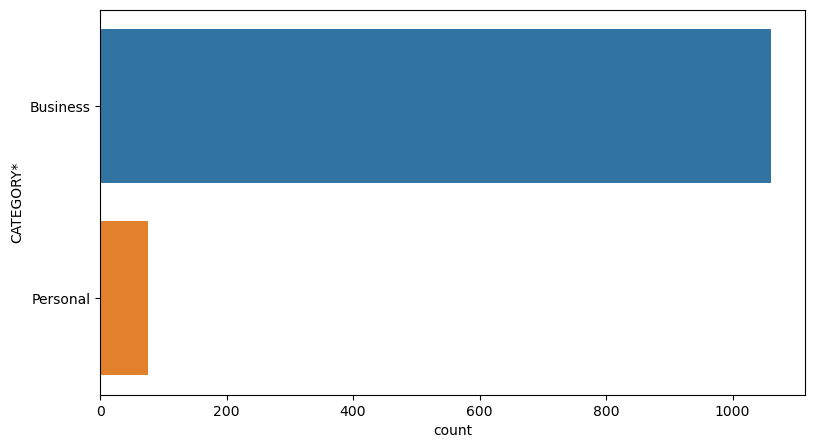

In [76]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)

sns.countplot(y='CATEGORY*', data=dataset)



2. For which purpose do people book Uber rides the most?

<Axes: xlabel='count', ylabel='PURPOSE*'>

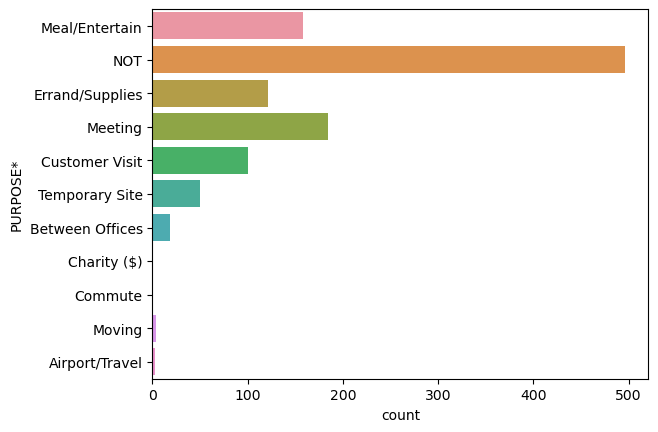

In [75]:


sns.countplot(y='PURPOSE*',data=dataset)

3. At what time do people book cabs the most from Uber?

<Axes: xlabel='count', ylabel='DAY-NIGHT*'>

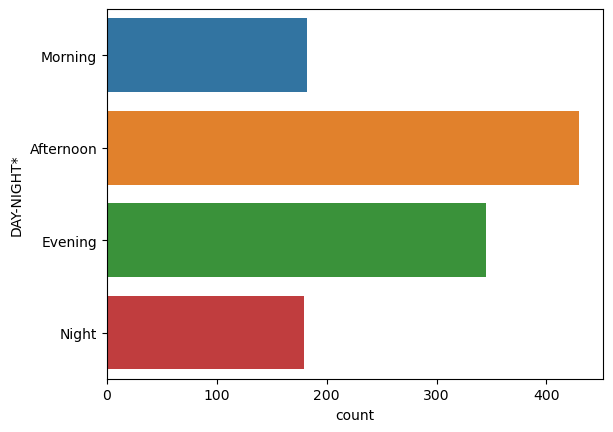

In [96]:
sns.countplot(y='DAY-NIGHT*',data=dataset)

4. In which months do people book Uber rides the most?

In [97]:
dataset.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,DATE*,TIME*,DAY-NIGHT*
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon


In [104]:
dataset['START_DATE*'] = pd.to_datetime(dataset['START_DATE*'], errors='coerce')
dataset['MONTH*'] = pd.DatetimeIndex(dataset['START_DATE*']).month
month_label = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
dataset['MONTH*'] = dataset['MONTH*'].map(month_label)
month_counts = dataset['MONTH*'].value_counts(sort=False)

In [105]:
dataset.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,DATE*,TIME*,DAY-NIGHT*,MONTH*
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning,Jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Jan


Text(0, 0.5, 'COUNT')

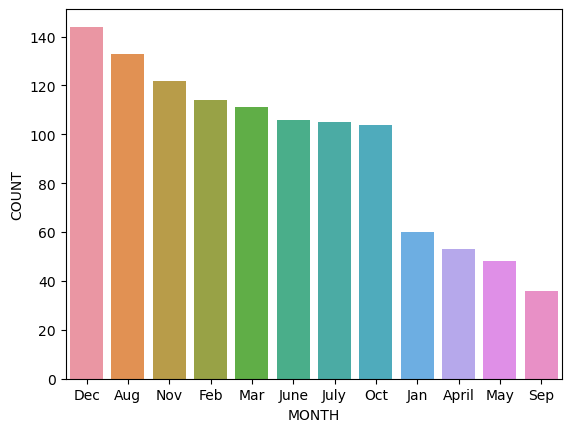

In [122]:
month_label=dataset['MONTH*'].value_counts()

sns.barplot(x=month_label.index,y=month_label)
plt.xlabel('MONTH')
plt.ylabel('COUNT')

5. On which days of the week do people book Uber rides the most?

In [116]:
dataset['DAY*']= dataset['START_DATE*'].dt.weekday

day_label={
    0:'Mon',1:'Tues',2:'Wed',3:'Thus',4:'Fri',5:'Sat',6:'Sun'
}
dataset['DAY*']=dataset['DAY*'].map(day_label)

In [117]:
dataset.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,DATE*,TIME*,DAY-NIGHT*,MONTH*,DAY*
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan,Fri
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning,Jan,Sat
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan,Sat
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan,Tues
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Jan,Wed


Text(0, 0.5, 'COUNT')

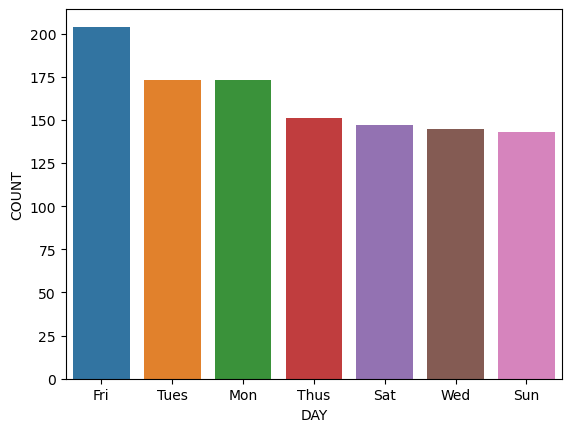

In [121]:
day_label=dataset['DAY*'].value_counts()

sns.barplot(x=day_label.index,y=day_label)
plt.xlabel('DAY')
plt.ylabel('COUNT')

6. How many miles do people usually book a cab for through uber?

<Axes: >

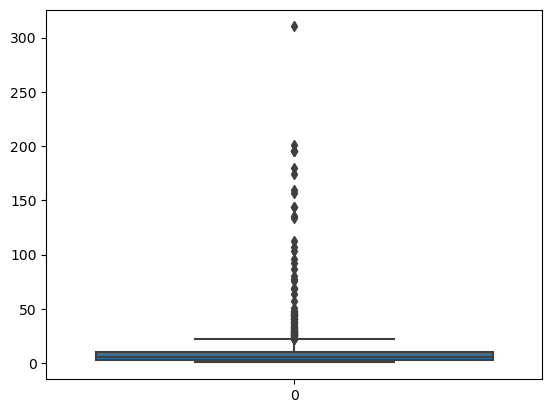

In [126]:
sns.boxplot(dataset['MILES*'])

<Axes: >

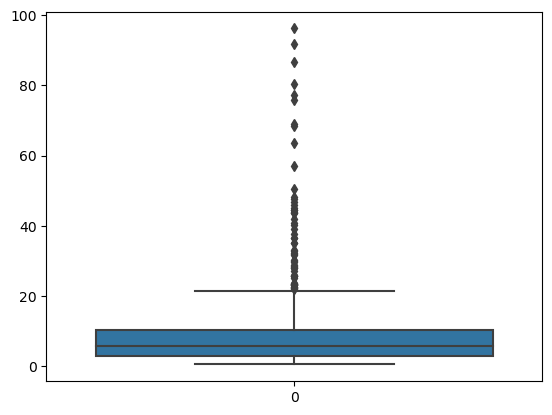

In [125]:
sns.boxplot(dataset[dataset['MILES*']<100]['MILES*'])

<Axes: >

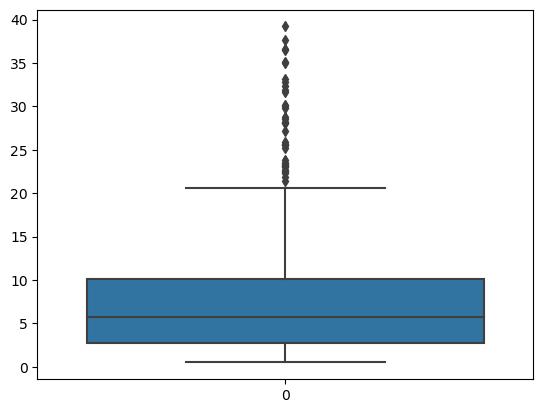

In [127]:
sns.boxplot(dataset[dataset['MILES*']<40]['MILES*'])

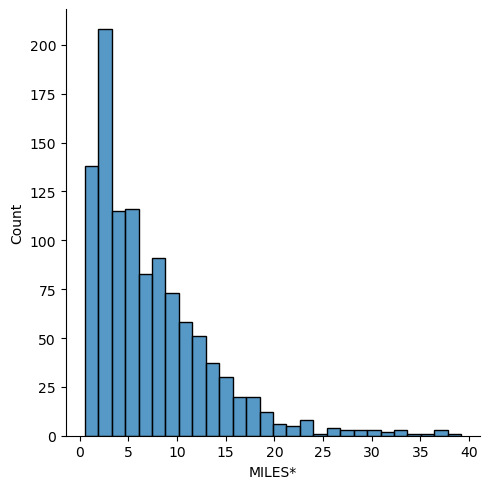

In [137]:
sns.displot(dataset[dataset['MILES*']<40]['MILES*'])

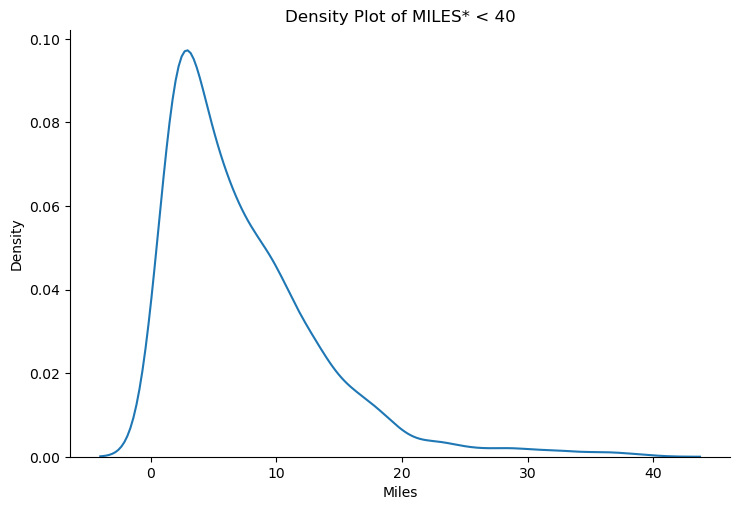

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the dataset for MILES* < 40

filtered_data = dataset[dataset['MILES*'] < 40]

# Plot the density plot
sns.displot(data=filtered_data, x='MILES*', kind='kde', height=5, aspect=1.5)
# Set plot labels
plt.title("Density Plot of MILES* < 40")
plt.xlabel("Miles")
plt.ylabel("Density")

# Show the plot
plt.show()
